In [28]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
import datetime as dt
from datetime import timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt
import scipy.stats as scs

import warnings
warnings.filterwarnings("ignore")
sns.set_style()
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\bobkova-
[nltk_data]     ao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
with open('..\\data\\interim\\dataset.pickle', 'rb') as f:
        dataset = pickle.load(f)

In [9]:
dataset

,link,data,file_name,message_content
0,http://kremlin.ru/events/president/transcripts...,2020-01-15,62582,Уважаемые члены Совета Федерации и депутаты Го...
1,http://kremlin.ru/events/president/transcripts...,2019-02-20,59863,Уважаемые члены Совета Федерации! Уважаемые де...
2,http://kremlin.ru/events/president/transcripts...,2018-03-01,56957,Уважаемые граждане России! Уважаемые члены Сов...
3,http://kremlin.ru/events/president/transcripts...,2016-12-01,53379,"Добрый день, уважаемые коллеги! Уважаемые член..."
4,http://kremlin.ru/events/president/transcripts...,2015-12-03,50864,Уважаемые члены Совета Федерации! Уважаемые де...
5,http://kremlin.ru/events/president/transcripts...,2014-12-04,47173,Уважаемые члены Совета Федерации! Депутаты Гос...
6,http://kremlin.ru/events/president/transcripts...,2013-12-12,19825,Уважаемые граждане России! Уважаемые члены Сов...
7,http://kremlin.ru/events/president/transcripts...,2012-12-12,17118,Уважаемые граждане России! Уважаемые члены Сов...
8,http://kremlin.ru/events/president/transcripts...,2011-12-22,14088,Уважаемые граждане России! Уважаемые депутаты ...
9,http://kremlin.ru/events/president/transcripts...,2010-11-30,9637,Уважаемые граждане России! Уважаемые депутаты ...


In [10]:
# preparing words for wordcloud
# all_words = " ".join(d for d in dataset['message_content'])

In [19]:
all_words = dataset['message_content'][0]

In [20]:
all_words

'Уважаемые члены Совета Федерации и депутаты Государственной Думы! Уважаемые граждане России! Послание Федеральному Собранию впервые оглашается в самом начале года. Нам нужно быстрее, не откладывая решать масштабные социальные, экономические, технологические задачи, перед которыми стоит страна. Их содержание и ориентиры отражены в национальных проектах, реализация которых требует нового качества государственного управления, работы Правительства, всех уровней власти, прямого диалога с гражданами. Сегодня в нашем обществе чётко обозначился запрос на перемены. Люди хотят развития и сами стремятся двигаться вперёд в профессии, знаниях, в достижении благополучия, готовы брать на себя ответственность за конкретные дела. Зачастую они лучше знают, что, почему и как надо менять там, где они живут, работают, – в городах, районах, сёлах, по всей стране. Темпы изменений должны нарастать с каждым годом, с ощутимыми для граждан результатами по достижению достойного уровня жизни. И, повторю, с их акт

In [30]:
stopwords = stopwords.words("russian")

In [36]:
# creating a mask
map_mask = np.array(Image.open("..\\data\\external\\map.jpeg"))

In [37]:
# creating a new wordcloud https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, # Width of the canvas
                      height=1000, # Height of the canvas
                      max_words=2000,
                      mask=map_mask, # gives a binary mask on where to draw words
                      contour_width=1, # If mask is not None and contour_width > 0, draw the mask contour.
                      contour_color='black', # Mask contour color
                      max_font_size=200,
                      min_font_size=1).generate(all_words)

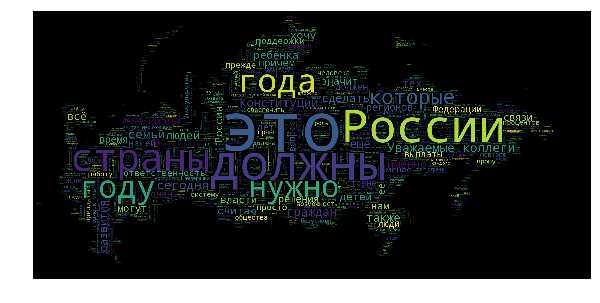

In [38]:
# plotting the wordcloud
fig, ax = plt.subplots(figsize=(10,10));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();

plt.imshow(wordcloud);
wordcloud.to_file('..\\reports\\figures\\cart_wordcloud.png')